<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/precedence_AddCircuit_Advanced_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Alireza Soroudi

*  [ Git repository: ](https://github.com/OptimizationExpert/Pyomo)
*   [Linkedin Newsletter: ](https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/ )

In [69]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import random
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
import numpy as np
import networkx as nx


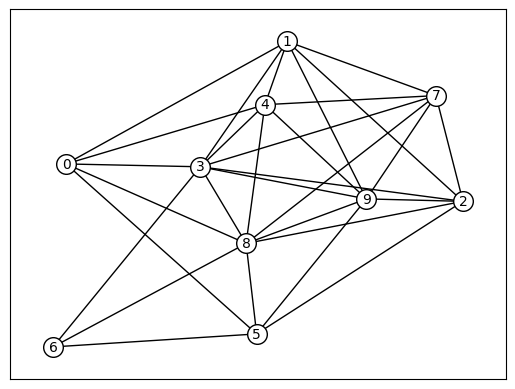

In [70]:
n = 10  # 10 nodes
m = 30  # 20 edges
seed = 2010  # seed random number generators for reproducibility
# Use seed for reproducibility
options = {
    "font_size": 10,
    "node_size": 200,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}

G = nx.gnm_random_graph(n, m, seed=seed)
pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
nx.draw_networkx(G, pos, **options)
plt.show()

def distG(i,j):
  x1,y1 = pos[i][0],pos[i][1]
  x2,y2 = pos[j][0],pos[j][1]
  return int(1000*np.sqrt( (x1-x2)**2 +(y1-y2)**2))

connect = {}
for (i,j) in G.edges():
  connect[i,j] = distG(i,j)
  connect[j,i] = distG(i,j)

In [71]:
precedence_list = [ (0,8), (1,4), (2,9) ]

In [72]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
nodes = [n for n in G.nodes()]
N = len(nodes)

U = {(i,j):model.NewBoolVar(f"connection_{i}_{j}")  for (i,j) in connect}
O = {i:model.NewIntVar(1,N,f"order_{i}") for i in nodes}

arcs = [(i,j,v) for (i,j),v in U.items() ]
model.AddCircuit(arcs)
start_node = 0
model.Add(O[start_node]==1)

for (i,j),v in U.items():
  if j!=start_node:
    model.Add(O[i]<O[j]).OnlyEnforceIf(v)

for (i,j) in precedence_list:
    model.Add(O[i]<O[j])

# Maximize x
expressions = [v*connect[i,j] for (i,j),v in U.items() ]
model.Minimize(sum(expressions))

status = solver.Solve(model)
if status == cp_model.OPTIMAL:
  print("Optimal solutionis found")


Optimal solutionis found


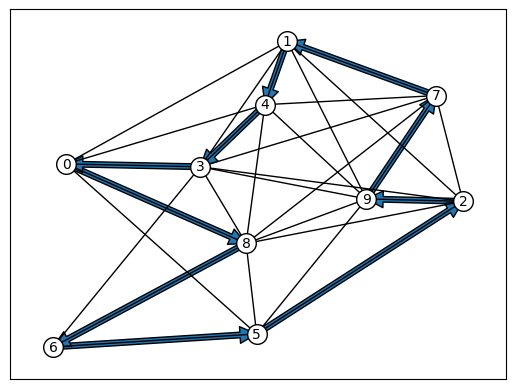

In [73]:
nx.draw_networkx(G, pos, **options)
for (i,j),v in U.items():
  if solver.Value(v)>0:
    x1,y1 = pos[i][0],pos[i][1]
    x2,y2 = pos[j][0],pos[j][1]
    dx, dy = x2-x1 , y2-y1
    plt.annotate('',xy=(x2,y2),xytext=(x1,y1), arrowprops={}, zorder=0)


